In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis = 1) # x0^2 + x1^2

In [40]:
def numerical_gradient_single_point(f, x, verbose=False): 
    h = 1e-4
    grad = np.zeros_like(x)
    if verbose:
        print('x.size={}'.format(x.size)) # (x0, x1) 을 입력으로 받음 --> 2
       
    for idx in range(x.size): #축별로 계산
        v_keep = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(v_keep) + h #n차원 입력 중 해당 차원으로만 h를 더하고
        fxh1 = f(x)
        if verbose:
            print(x, '-->', fxh1)
        
        # f(x-h) 계산
        x[idx] = float(v_keep) - h #n차원 입력 중 해당 차원으로만 h를 빼서
        fxh2 = f(x)
        if verbose:
            print(x, '-->', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) #n차원 방향의 차분을 구함 !
        x[idx] = v_keep # 값 복원
        
        if verbose:
            print('grad[{}]={}'.format(idx, grad[idx]))
            print()
    return grad

In [41]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_single_point(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)
        
        return grad

In [42]:
def gradient_descent(f, init_x, lr =0.1, step_num= 100, verbose = False):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        if verbose:
            print(x, grad)
        x -= lr * grad
        
    return x

In [50]:
def gradient_descent(f, init_x, lr =0.1, step_num= 100, return_history = False, verbose = False):
    x = init_x
    vx = np.zeros((step_num+1, 2)) # x의 궤적의 변화를 기록하기 위한 list 초기화
    vx[0] = x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        
        x -= lr * grad
        if verbose:
            print(x, grad)
            
        vx[i+1] = x # keep x in the history list
    
    if return_history:
        
        return np.array(x), np.array(vx)
    else:
        return np.array(x)

In [51]:
init_x = np.array([-2.0, 2.0])

In [52]:
learning_rate = 0.1

In [53]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate,
                                   return_history = True, verbose=False)

In [54]:
x_final

array([-4.07407195e-10,  4.07407195e-10])

In [55]:
x_hist.shape

(101, 2)

In [56]:
x_hist.ndim

2

In [57]:
Z_hist = function_2(np.array(x_hist))

In [58]:
np.shape(x_hist), np.shape(Z_hist)

((101, 2), (101,))

Text(0.5, 1.0, 'Learning rate = 0.1')

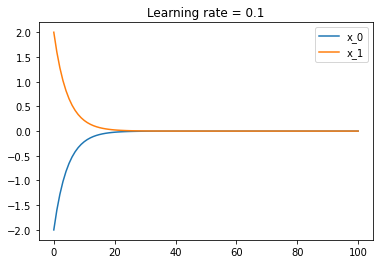

In [59]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

둘다 $x_0$ 과 $x_1$ 모두 0으로 수렴하는 것을 확인 가능 !

다음 조건에서의

    lr = 0.1, step_num = 100, init_x = np.array([-3.0, 4.0])
    
예상결과
    
    array([-6.11110793e-10,  8.14814391e-10])

In [60]:
init_x = np.array([-3.0, 4.0])

In [61]:
learning_rate = 0.1

In [62]:
#x_final = gradient_descent(function_2, init_x = init_x, lr = 0.1)

In [63]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, 
                                   return_history = True, verbose = False)

최종값이 아래에 수렴함을 확인 

In [64]:
x_final

array([-6.11110793e-10,  8.14814391e-10])

Expected output when lr = 0.1, step_num = 100, init_x = np.array([-3.0, 4.0]):

    array([-6.11110793e-10,  8.14814391e-10])

Text(0.5, 1.0, 'Learning rate = 0.1')

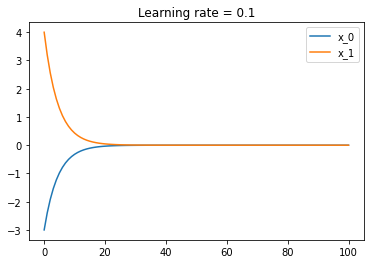

In [65]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0','x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

### 생각해보기

In [13]:
init_x

array([-3.,  4.])

* 생각해보기 1 : 위의 초기값인 init_x이 0에 수렴하는 것을 확인할 수 있다. 
    
    : 최솟값인 (0,0)으로 향하는 것을 보아 경사법을 통해 진정한 최솟값을 구한 것을 알 수 있다.


* 생각해보기 2: 100번까지 굳이 반복했어야 했나?

    : 그래프를 통해 보아하니 100번까지가 아니어도 30번 40번 정도 였어도 '0'에 수렴할 수 있었을 거라 생각된다.

### TODO_1
   * lr = 10.0

In [66]:
learning_rate = 10.0 

In [67]:
x_final1, x_hist1 = gradient_descent(function_2, init_x.copy(), lr = learning_rate, return_history = True, verbose = False)

In [68]:
x_final1

array([-2.58983747e+13, -1.29524862e+12])

Text(0.5, 1.0, 'Learning rate = 10.0')

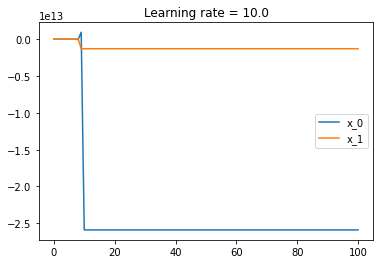

In [69]:
plt.plot(x_hist1[:,0])
plt.plot(x_hist1[:,1])
plt.legend(['x_0','x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

* 논의해보기

* lr = 0.0001

In [70]:
learning_rate = 0.0001

In [71]:
x_final2, x_hist2 = gradient_descent(function_2, init_x.copy(), lr = learning_rate, return_history = True, verbose = False)

In [72]:
x_final2

array([-2.94059014,  3.92078685])

Text(0.5, 1.0, 'Learning rate = 0.0001')

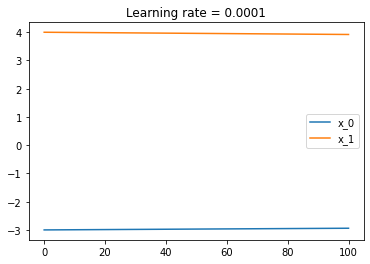

In [73]:
plt.plot(x_hist2[:,0])
plt.plot(x_hist2[:,1])
plt.legend(['x_0','x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

* 논의해보기

### TODO_2 : 3차원 좌표 

* lr = 0.1

In [74]:
from mpl_toolkits.mplot3d import Axes3D
x0 = np.arange(-2, 2, 0.25) 
x1 = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(x0, x1)
print(X.shape,Y.shape)

nrows = X.shape[0]
ncols = X.shape[1]

Xf = X.flatten()
Yf = Y.flatten()
arr = np.array([Xf, Yf]).transpose()

print(Xf.shape,Yf.shape)
print('arr.shape={} arr.ndim={}'.format(arr.shape, arr.ndim))

Z = function_2(arr)
print(Z.shape)

Z = np.reshape(Z, (nrows,ncols))
print(X.shape, Y.shape, Z.shape)

(16, 16) (16, 16)
(256,) (256,)
arr.shape=(256, 2) arr.ndim=2
(256,)
(16, 16) (16, 16) (16, 16)


In [75]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'z')

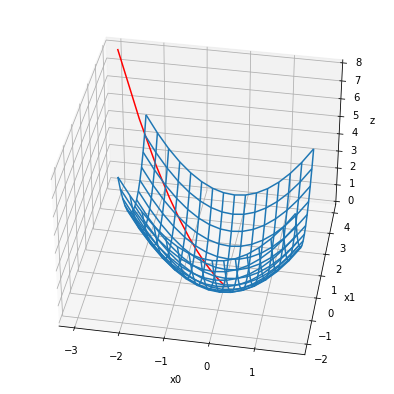

In [96]:
fig = plt.figure(figsize = (15,7))
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z)
ax.plot(x_hist[:,0], x_hist[:,1], Z_hist,'r')

ax.view_init(elev=37., azim=280) #바꾸어보세요
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('z')